## ME4: Decision Tree Classifiers

#### Collaborators

Notes: This homework can be done individually or by a troup of two. If this is done by a group, please write the names of students who work together. Make sure that each individual makes own submission(s). 

-

-



### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Read each cell of the examples below, run and check the outputs. 

### Confusion matrix simple example 1 - binary classification

In [3]:
y_true1 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred1 = [1, 1, 0, 1, 1, 0, 1, 1, 1]


confusion_mat1 = confusion_matrix(y_true1, y_pred1)

print(confusion_mat1)

[[2 2]
 [0 5]]


In [4]:
# Print classification report
target_names2 = ['Class-0', 'Class-1']

result_metrics = classification_report(y_true1, y_pred1, target_names=target_names2)

print(result_metrics)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



### Confusion matrix simple example 2 - multiclass classification

In [5]:
y_true2 = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred2 = [1, 1, 0, 2, 1, 0, 1, 3, 3]

confusion_mat2 = confusion_matrix(y_true2, y_pred2)
print(confusion_mat2)

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


In [6]:
# Print classification report
target_names2 = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics2 = classification_report(y_true2, y_pred2, target_names=target_names2)

print(result_metrics2)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Decision Tree Classifier

- dataset: iris dataset

In [7]:
from IPython.display import Image

Image("images/iris.png")

FileNotFoundError: No such file or directory: 'images/iris.png'

FileNotFoundError: No such file or directory: 'images/iris.png'

<IPython.core.display.Image object>

#### Data visualization of the iris dataset before we start training and testing a model

- iris.csv is stored in a local folder 'data'. 

<class 'pandas.core.frame.DataFrame'>
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica


<Figure size 432x288 with 0 Axes>

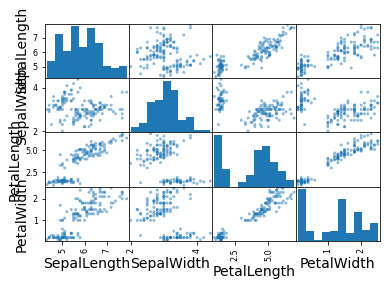

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
iris = pd.read_csv('./data/iris.csv')

# make sure you understand the type of the object
print(type(iris))

# check the top five and the botoom five data tuples
print(iris.head())
print(iris.tail())

# scatter matrix plot
pd.plotting.scatter_matrix(iris);

plt.figure()

## Decision Trees

- Read the details of decision tree classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Check out the difference between model parameters and hyper parameters:

https://towardsdatascience.com/model-parameters-and-hyperparameters-in-machine-learning-what-is-the-difference-702d30970f6


## A simple example of DT modeling

- We first start the modeling without k-cross validation here but show step-by-step code segments how to train a model and test it. 

### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine. 

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()

# make sure that you understand the type of the object
#print(type(iris)) 
#print(iris)

print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Split the data to training and testing 

In [10]:
from sklearn.model_selection import train_test_split

X = iris.data # sepal length and width, petal length and width
y = iris.target

#print(X)

# split the data 70% for training, 30% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)


## Training
### Learing using training data

- use Gini index measure 

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

## Testing
### Evaluating the model using testing data

In [12]:
y_pred = tree_clf.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 1])

## Model performance

### Confusion matrix

In [21]:
# plot a confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)


print(type(iris))

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
<class 'sklearn.utils.Bunch'>


### Model performance summary

In [14]:
# Print classification report

target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [15]:
# you can access each class's metrics from result_metrics
# output_dict should be set to True
result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict)

# an example that shows how to access the value of precision metric of class 'setosa'
print(result_metrics_dict['setosa']['precision'])

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'versicolor': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 10}, 'virginica': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 10}, 'accuracy': 0.9333333333333333, 'macro avg': {'precision': 0.9444444444444445, 'recall': 0.9333333333333332, 'f1-score': 0.9326599326599326, 'support': 30}, 'weighted avg': {'precision': 0.9444444444444445, 'recall': 0.9333333333333333, 'f1-score': 0.9326599326599326, 'support': 30}}
1.0


### Draw a decision tree

- You may need to install graphviz package!

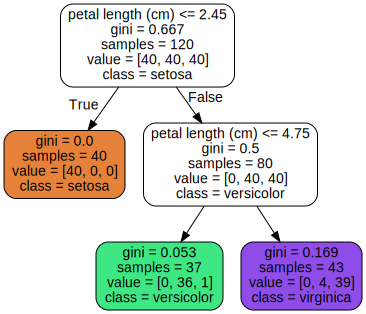

In [16]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

### Important features from a decision tree using gini index

- Decision tree classifier

https://scikit-learn.org/stable/modules/tree.html#classification

- Metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

In [17]:
# plot important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.97


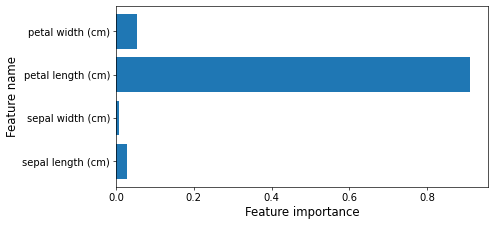

Feature importances: [0. 0. 1. 0.]


In [18]:
clf1 = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf1.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf1.score(X_test, y_test)))


plt.figure(figsize=(8,4), dpi=60)

# call the function above
plot_feature_importances(clf1, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(tree_clf.feature_importances_))

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.93


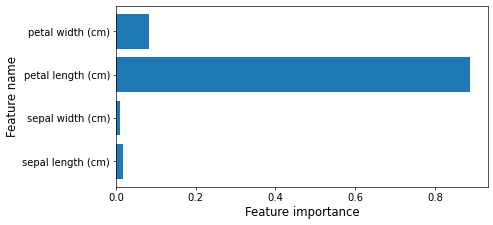

Feature importances: [0. 0. 1. 0.]


In [19]:
clf2 = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))


plt.figure(figsize=(8,4), dpi=60)

# call the function above
plot_feature_importances(clf2, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(tree_clf.feature_importances_))

## k-Cross Validation

- using KFold function with freedom

In [20]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [21]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.89      0.94        18

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.97      0.96      0.96        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89        20
   virginica       0.78      1.00      0.88        14

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.94      0.92      0.92        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.81      1.00      0.89        17
   virginica       1.00      0.78      0.88        18

    accuracy        

# Predicting classes and class probabilities

In [22]:
# Class0 (setona) 
prob = tree_clf.predict_proba([[5.0, 3.4, 1.3, 0.2]]) 

# check predictions for different samples
# Class1 (versicolor)
#prob = tree_clf.predict_proba([[7.1, 3.1, 4.8, 1.4]])

# Class2 (virginica)
#prob = tree_clf.predict_proba([[6.4, 2.7, 4.9, 1.8]])

print(prob)


[[1. 0. 0.]]


In [23]:
# predict class1 (versicolor)
predicted = tree_clf.predict([[5.0, 3.4, 1.3, 0.2]])

print(predicted)

[0]


## ME4

### Part 1

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

## Part 2

1. See DT examples at:
    
https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

2. Discuss about different ways to handle the following types of data for decision tree classification. 

    - text data (strings): in the case a dataset includes non-numerical data. 

    - continuous data like age, weight, income, etc.


KFold(n_splits=10, random_state=None, shuffle=True)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.83      0.62      0.71         8
   virginica       0.40      0.67      0.50         3

    accuracy                           0.73        15
   macro avg       0.74      0.76      0.74        15
weighted avg       0.79      0.73      0.75        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.75      1.00      0.86         3
   virginica       1.00

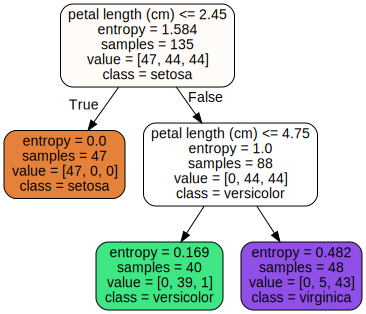

In [32]:
kf = KFold(n_splits=10, random_state=None, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))
    export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

display(Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot")))
    

When we compare the entropy and the gini, the gini has index is ranging from 0 to .5 while the entropy interval is in the range of 0 to 1. The trees are different, but the results and the splits are similar.

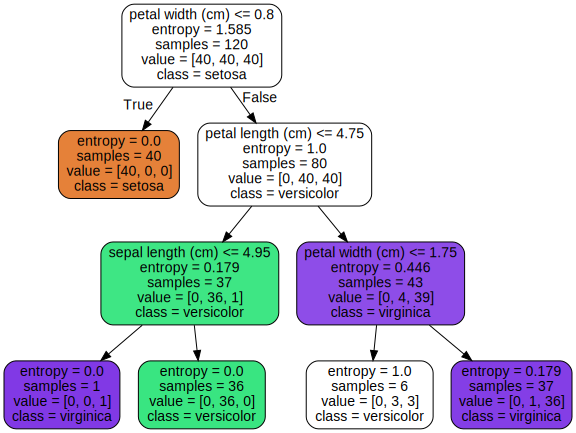

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



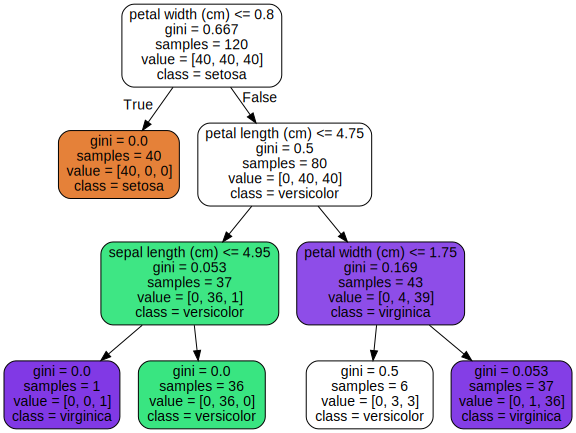

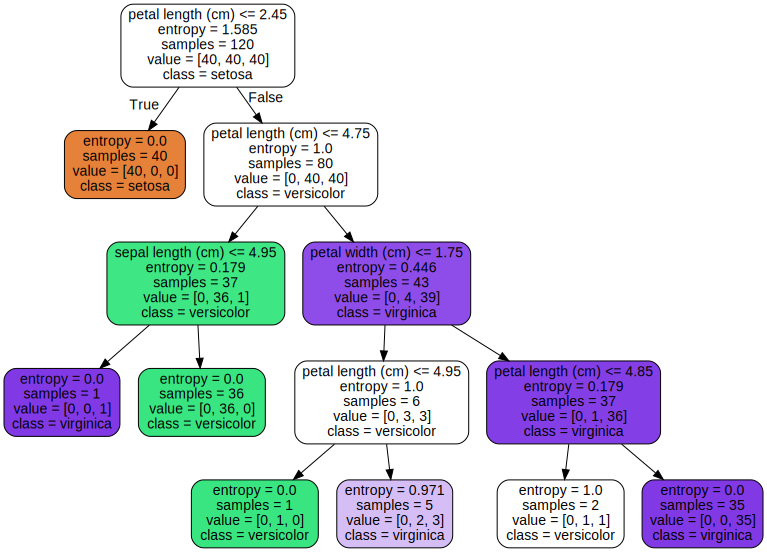

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



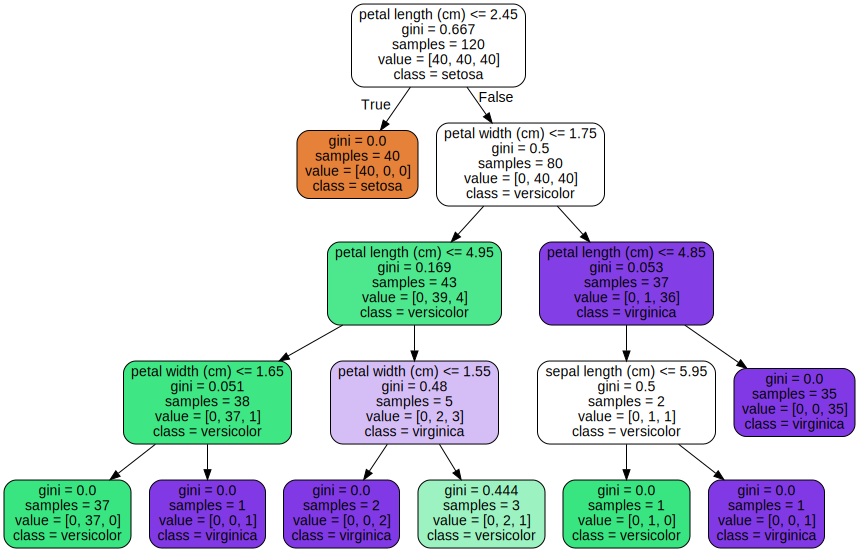

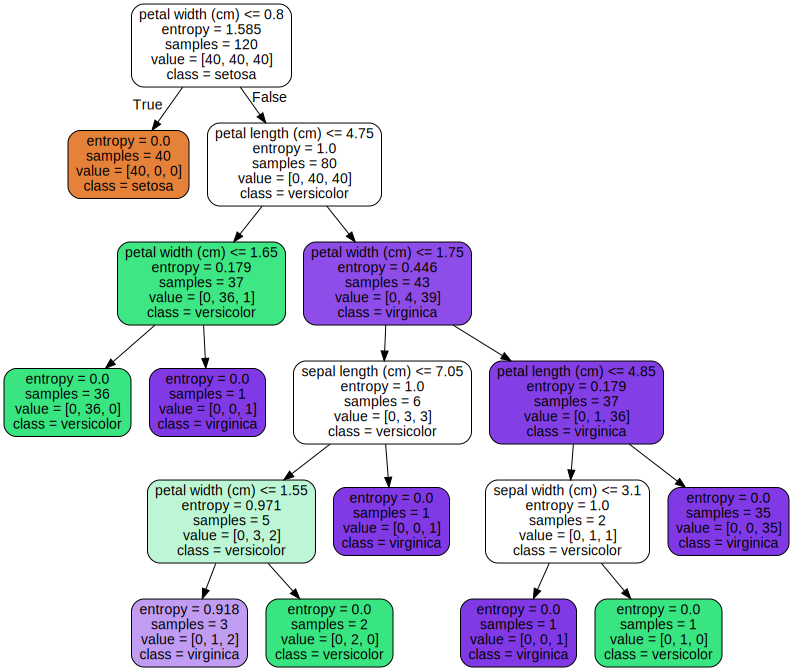

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



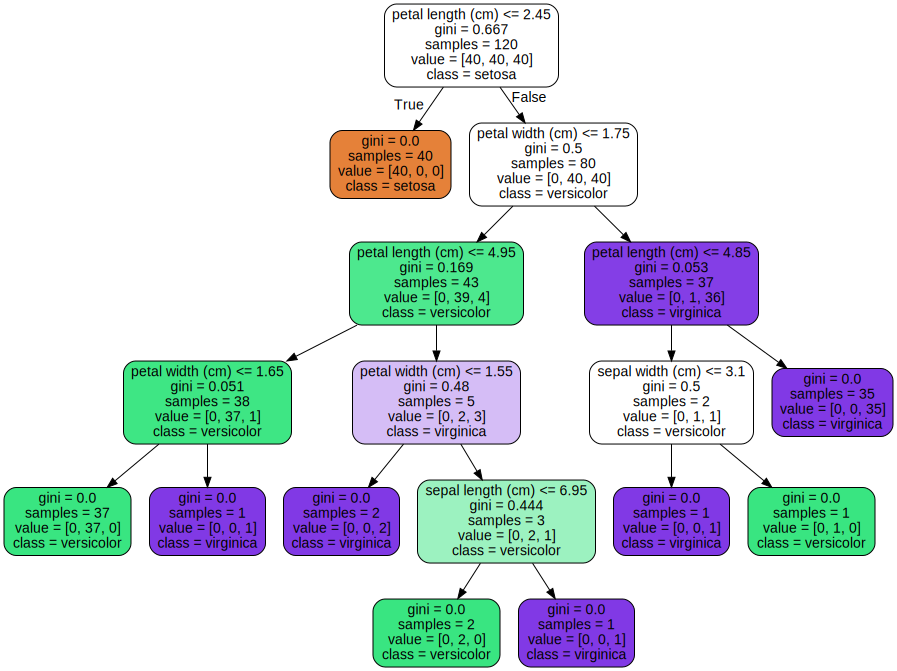

In [30]:
# split the data 70% for training, 30% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

for x in range(3,6):
    tree_clf = DecisionTreeClassifier(max_depth=x, criterion='entropy')
    tree_clf.fit(X_train, y_train)

    export_graphviz(
            tree_clf,
            out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
            feature_names=iris.feature_names,
            class_names=iris.target_names,
            rounded=True,
            filled=True
        )

    display(Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot")))
    
    tree_clf = DecisionTreeClassifier(max_depth=x, criterion='gini')
    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    results = classification_report(y_test, y_pred, target_names=target_names)
    print(results)

    export_graphviz(
            tree_clf,
            out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
            feature_names=iris.feature_names,
            class_names=iris.target_names,
            rounded=True,
            filled=True
        )

    display(Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot")))


Increasing the max depth of the decision tree adds an extra level in the tree for both the gini and the entropy indexes. however it doesn't appear to greatly affect it's predictive capabilities.

In [31]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')

k_values = [3,5,7,10]

for k in k_values:
    precision = []
    recall = []
    accuracy = []
    
    kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into k folds 
    
    train_score = []
    test_score = []
    for train_index, test_index in kf.split(X):
        
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        tree_clf.fit(X_train, y_train)
        y_pred = tree_clf.predict(X_test)
        
        train_score.append(tree_clf.score(X_train, y_train))
        test_score.append(tree_clf.score(X_test, y_test))
        
        #print(f"k={k}")
        print("training score: ", tree_clf.score(X_train, y_train))
        print("testing score: ", tree_clf.score(X_test, y_test))
    
        # plot a confusion matrix
        confusion_mat = confusion_matrix(y_test, y_pred)
        print(confusion_mat)
    
        #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        results = classification_report(y_test, y_pred, target_names=target_names)
        print(results)

        metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)

        avg_precision = metrics_dict['weighted avg']['precision']
        #print('precision (weighted):', avg_precision)
        precision.append(avg_precision)
    
        avg_recall = metrics_dict['weighted avg']['recall']
        #print('recall avg (weighted):', avg_recall)
        recall.append(avg_recall)
    
        avg_accuracy = metrics_dict['accuracy']
        #print('accuracy: ', avg_accuracy)
        accuracy.append(avg_accuracy)
        
    print('\n******* Performance with k =', k, '*******')
    print('Precision: ', sum(precision)/len(precision))
    print('Recall: ', sum(recall)/len(recall))
    print('Accuracy: ', sum(accuracy)/len(accuracy))
    print('**************************************\n')

training score:  0.97
testing score:  0.94
[[19  0  0]
 [ 0 15  1]
 [ 0  2 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.88      0.94      0.91        16
   virginica       0.93      0.87      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50

training score:  0.96
testing score:  0.96
[[17  0  0]
 [ 0 13  1]
 [ 0  1 18]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      0.93      0.93        14
   virginica       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

training score:  0.96
testing score:  0.96
[[14  0  0]
 [ 0 20  0]
 [ 0  2 14]

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')

k_values = [3,5,7,10]

for k in k_values:
    precision = []
    recall = []
    accuracy = []
    
    kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into k folds 
    
    train_score = []
    test_score = []
    for train_index, test_index in kf.split(X):
        
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        tree_clf.fit(X_train, y_train)
        y_pred = tree_clf.predict(X_test)
        
        train_score.append(tree_clf.score(X_train, y_train))
        test_score.append(tree_clf.score(X_test, y_test))
        
        #print(f"k={k}")
        print("training score: ", tree_clf.score(X_train, y_train))
        print("testing score: ", tree_clf.score(X_test, y_test))
    
        # plot a confusion matrix
        confusion_mat = confusion_matrix(y_test, y_pred)
        print(confusion_mat)
    
        #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
        results = classification_report(y_test, y_pred, target_names=target_names)
        print(results)

        metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)

        avg_precision = metrics_dict['weighted avg']['precision']
        #print('precision (weighted):', avg_precision)
        precision.append(avg_precision)
    
        avg_recall = metrics_dict['weighted avg']['recall']
        #print('recall avg (weighted):', avg_recall)
        recall.append(avg_recall)
    
        avg_accuracy = metrics_dict['accuracy']
        #print('accuracy: ', avg_accuracy)
        accuracy.append(avg_accuracy)
        
    print('\n******* Performance with k =', k, '*******')
    print('Precision: ', sum(precision)/len(precision))
    print('Recall: ', sum(recall)/len(recall))
    print('Accuracy: ', sum(accuracy)/len(accuracy))
    print('**************************************\n')

training score:  0.98
testing score:  0.9
[[12  0  0]
 [ 0 20  2]
 [ 0  3 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.87      0.91      0.89        22
   virginica       0.87      0.81      0.84        16

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.90      0.90      0.90        50

training score:  0.95
testing score:  0.96
[[21  0  0]
 [ 0 11  2]
 [ 0  0 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       1.00      0.85      0.92        13
   virginica       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50

training score:  0.97
testing score:  0.9
[[17  0  0]
 [ 0 13  2]
 [ 0  3 15]]


Increasing the folds in the cross validation doesn't change much in the classification metrics of both gini and entropy indexes. If anything both seem to degrade with increased folds.

 ## 2)
 When the data the is continuous, then I would have numeric conditionals to determing where to group them. For example, I would have the percentage on a test as a condition on if the person passed or not. Having a classifier would be different though, because I would need to add more layers of conditions to try to group the data correctly. Like determining the species of a bug which would have a lot of variables to consider and determine the species correctly. I suspect the name column wouldn't be very useful (although maybe you could look for titles and do something with that) but sex already works as two groups. Cabin is probably the most interesting string column because it may yield interesting information in combination with other information. For istance cabin codes could be checked agains where on the ship their cabin was which would potentially yield vary good information about if a passenger survived or not.


### Submission(s): Each individual student should make own submission. 

- Upload the notebook on your Git repo and provide an URL link in your summar. 

- Submit your summar to Canvas
